In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas



In [154]:
df = pd.read_csv('Datathone.csv')

<li> Singleton : All women in this study had a single baby, no multiples. <br><br>
<li> Medicaid_Program : FAMIS MOMS - program that serves pregnant women with incomes up to 200 percent of the FPL and provides benefits similar to Medicaid. Medicaid Expansion - program that serves adults ages 19 to 64 years of age with incomes up to 133 percent of the FPL. Members who become pregnant while already enrolled in the Medicaid Expansion group may remain in that eligibility category during the pregnancy Medicaid for Pregnant Women - program that serves pregnant women with incomes up to 143 percent of the federal poverty level (FPL) Not Enrolled - women who were not enrolled in Medicaid prior to delivery Other Aid Categories - include births paid by Medicaid that do not fall within the Medicaid for Pregnant Women, Medicaid Expansion, or FAMIS MOMS programs<br><br>
<li> Population_Group : Study Population- Women enrolled in Medicaid for Pregnant Women, Medicaid Expansion, FAMIS MOMS, or Other Aid Categories on the date of delivery, with continuous enrollment in any Medicaid program or combination of programs for 120 or more days (counting the date of delivery),"Comparison Group- Women enrolled in any of the four Medicaid programs (i.e., Medicaid for Pregnant Women, Medicaid Expansion, FAMIS MOMS, or Other Aid Categories) on the date of delivery with continuous enrollment in any Medicaid program or combination of programs for fewer than 120 days (counting the date of delivery), Comparison Group- Women enrolled in any of the four Medicaid programs (i.e., Medicaid for Pregnant Women, Medicaid Expansion, FAMIS MOMS, or Other Aid Categories) on the date of delivery with continuous enrollment in any Medicaid program or combination of programs for fewer than 120 days (counting the date of delivery)<br><br>
<li> Delivery_System : Women enrolled in FFS, Managed Care Organization (MCO), or NA (not enrolled in Medicaid prior to delivery)<br><br>
<li> MCO_COUNT : Enrolled with more than one MCO prior to delivery Enrolled with one MCO prior to delivery , Not enrolled prior to delivery - women were not enrolled in FFS or Managed Care prior to delivery , Not enrolled with an MCO prior to delivery (e.g., FFS) - women were enrolled in FFS, not managed care, prior to delivery<br><br>
<li>Cont_Enroll_Category : Length of time the woman was continuously enrolled in any Medicaid program or combination of programs without a break in coverage<br><br>
<li> Gravidity : The number of times the woman has been pregnant<br><br>
<li>Trimester : Trimester of prenatal care initiation<br><br>
<li>Maternal_Region	: Woman's managed care region of residence<br><br>
<li> Maternal_RaceEth : Woman's rate/ethnicity<br><br>
<li> Maternal_Age : Woman's age at delivery<br><br>
<li> MATERNAL_ASTHMA : Women diagnosed as having Asthma (Y, N, NA= women not enrolled prior to pregnancy)<br><br>
<li> MATERNAL_DIABETES	: Women diagnosed as having Maternal Diabetes (Y, N, NA= women not enrolled prior to pregnancy)<br><br>
<li> GESTATIONAL_DIABETES : Women diagnosed as having Gestational Diabetes (Y, N, NA= women not enrolled prior to pregnancy)<br><br>

<li> PNC_Index : Adequate Plus PNC - women who received 110% or more of expected prenatal care visits , Adequate PNC - women who received 80–109% of expected prenatal care visits , Intermediate PNC - women who received 50–79% of expected prenatal care visits , Inadequate PNC - women who received less than 50% of expected prenatal care visits , Births with No Prenatal Care - women who received 0% of expected prenatal care visits , "Missing Info - Information on the number of prenatal care visits is unavailable <br><br>

<li> Gestational_Age : Gestational age at time of delivery Extremely Preterm - baby born before 28 weeks of pregnancy , Very Preterm - baby born 28-31 weeks of pregnancy , Moderate Preterm - baby born 32-33 weeks of pregnancy , Late Preterm - baby born 34-36 weeks of pregnancy , Early Term - baby born 37-38 weeks of pregnancy , Full Term - baby born 39-40 weeks of pregnancy , Late Term - baby born 41 weeks of pregnancy , Post Term - baby born after 41 weeks of pregnancy , Missing - Information is unavailable <br><br>
<li> Birth_Weight : Very Low - birth weights less than 1,500 grams , Moderately Low - birth weights between 1,500 and 2,499 grams , Not Low - birth weights greater than 2,499 grams ,Missing - Information is unavailable <br><br>
<li> Delivery_Method : Vaginal, Cesarean , Missing <br><br>
<li> ED_Utilization	: Women who utilized ED services within 90 days of delivery <br><br>
<li> AMB_Utilization : Women who utilized ambulatory care services within 90 days of delivery <br><br>
<li> Prenatal_SBIRT	: Women who completed a Screening, Brief Intervention and Referral to Treatment (SBIRT) screening prior to delivery <br><br>
<li> Postpartum_SBIRT : Women who completed a Screening, Brief Intervention and Referral to Treatment (SBIRT) screening after delivery <br><br>
<li> Prenatal_DepScr : Women who received a screening for depression during pregnancy <br><br>
<li> Postpartum_DepScr : Women who received a screening for depression on or between seven and 84 days after delivery <br><br>






In [155]:
df.head()

,Singleton,Medicaid_Program,Population_Group,Delivery_System,MCO_COUNT,Cont_Enroll_Category,Gravidity,Trimester,Maternal_Region,Maternal_RaceEth,...,PNC_Index,Gestational_Age,Birth_Weight,Delivery_Method,ED_Utilization,AMB_Utilization,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr,Postpartum_DepScr
0,Singleton,Medicaid for Pregnant Women,Comparison Group,Fee-for-Service,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,Had Prior Pregnancy,1st,Tidewater,African American,...,Adequate Plus PNC,Early Term,Not Low,Vaginal,False,False,False,False,False,False
1,Singleton,Medicaid for Pregnant Women,Comparison Group,Fee-for-Service,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,No Prior Pregnancy,3rd,Tidewater,White,...,Inadequate PNC,Early Term,Not Low,Vaginal,False,False,False,False,False,False
2,Singleton,Not Enrolled,Comparison Group,NaN,Not enrolled prior to delivery,Not enrolled,No Prior Pregnancy,1st,Tidewater,White,...,Intermediate PNC,Early Term,Not Low,Vaginal,False,False,False,False,False,False
3,Singleton,Other Aid Categories,Comparison Group,Managed Care,Enrolled with one MCO prior to delivery,Enrolled for 31 to 90 days prior to delivery,No Prior Pregnancy,2nd,Tidewater,African American,...,Adequate PNC,Full Term,Not Low,Vaginal,False,False,False,False,True,False
4,Singleton,Medicaid for Pregnant Women,Comparison Group,Fee-for-Service,Not enrolled with an MCO prior to delivery (e....,Enrolled for 91 to 180 days prior to delivery,Had Prior Pregnancy,2nd,Tidewater,African American,...,Adequate PNC,Full Term,Not Low,Vaginal,False,False,False,False,False,False


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34401 entries, 0 to 34400
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Singleton             34401 non-null  object
 1   Medicaid_Program      34401 non-null  object
 2   Population_Group      34401 non-null  object
 3   Delivery_System       33426 non-null  object
 4   MCO_COUNT             34401 non-null  object
 5   Cont_Enroll_Category  34401 non-null  object
 6   Gravidity             34401 non-null  object
 7   Trimester             34401 non-null  object
 8   Maternal_Region       34401 non-null  object
 9   Maternal_RaceEth      34401 non-null  object
 10  Maternal_Age          34401 non-null  object
 11  MATERNAL_ASTHMA       33427 non-null  object
 12  MATERNAL_DIABETES     33426 non-null  object
 13  GESTATIONAL_DIABETES  33426 non-null  object
 14  PNC_Index             34401 non-null  object
 15  Gestational_Age       34401 non-null

In [157]:
df.isnull().sum()

Singleton                 0
Medicaid_Program          0
Population_Group          0
Delivery_System         975
MCO_COUNT                 0
Cont_Enroll_Category      0
Gravidity                 0
Trimester                 0
Maternal_Region           0
Maternal_RaceEth          0
Maternal_Age              0
MATERNAL_ASTHMA         974
MATERNAL_DIABETES       975
GESTATIONAL_DIABETES    975
PNC_Index                 0
Gestational_Age           0
Birth_Weight              0
Delivery_Method           0
ED_Utilization            0
AMB_Utilization           0
Prenatal_SBIRT            0
Postpartum_SBIRT          0
Prenatal_DepScr           0
Postpartum_DepScr         0
dtype: int64

In [158]:
df.columns

Index(['Singleton', 'Medicaid_Program', 'Population_Group', 'Delivery_System',
       'MCO_COUNT', 'Cont_Enroll_Category', 'Gravidity', 'Trimester',
       'Maternal_Region', 'Maternal_RaceEth', 'Maternal_Age',
       'MATERNAL_ASTHMA', 'MATERNAL_DIABETES', 'GESTATIONAL_DIABETES',
       'PNC_Index', 'Gestational_Age', 'Birth_Weight', 'Delivery_Method',
       'ED_Utilization', 'AMB_Utilization', 'Prenatal_SBIRT',
       'Postpartum_SBIRT', 'Prenatal_DepScr', 'Postpartum_DepScr'],
      dtype='object')

In [159]:
df.shape

(34401, 24)

In [160]:
df['Maternal_Region'].value_counts()

Central                    9068
Northern & Winchester      8582
Tidewater                  8158
Charlottesville/Western    4323
Roanoke/Alleghany          3154
Southwest                  1108
Missing/Unknown               8
Name: Maternal_Region, dtype: int64

# Preprocessing

In [161]:
df = df.drop_duplicates()

In [162]:
df = df.dropna()

In [163]:
df.isnull().sum()

Singleton               0
Medicaid_Program        0
Population_Group        0
Delivery_System         0
MCO_COUNT               0
Cont_Enroll_Category    0
Gravidity               0
Trimester               0
Maternal_Region         0
Maternal_RaceEth        0
Maternal_Age            0
MATERNAL_ASTHMA         0
MATERNAL_DIABETES       0
GESTATIONAL_DIABETES    0
PNC_Index               0
Gestational_Age         0
Birth_Weight            0
Delivery_Method         0
ED_Utilization          0
AMB_Utilization         0
Prenatal_SBIRT          0
Postpartum_SBIRT        0
Prenatal_DepScr         0
Postpartum_DepScr       0
dtype: int64

In [164]:
df = df[['Medicaid_Program', 'Maternal_Region', 'Population_Group', 'MCO_COUNT', 'Cont_Enroll_Category', 'PNC_Index', 'Prenatal_SBIRT', 'Postpartum_SBIRT', 'Prenatal_DepScr']]


In [165]:
df

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,Medicaid for Pregnant Women,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,Adequate Plus PNC,False,False,False
1,Medicaid for Pregnant Women,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,Inadequate PNC,False,False,False
3,Other Aid Categories,Tidewater,Comparison Group,Enrolled with one MCO prior to delivery,Enrolled for 31 to 90 days prior to delivery,Adequate PNC,False,False,True
4,Medicaid for Pregnant Women,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for 91 to 180 days prior to delivery,Adequate PNC,False,False,False
6,FAMIS MOMS,Charlottesville/Western,Comparison Group,Enrolled with one MCO prior to delivery,Enrolled for 91 to 180 days prior to delivery,Adequate Plus PNC,False,False,False
...,...,...,...,...,...,...,...,...,...
34394,Medicaid Expansion,Tidewater,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Inadequate PNC,False,False,False
34395,Medicaid for Pregnant Women,Central,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Adequate PNC,False,False,False
34396,FAMIS MOMS,Tidewater,Study Population,Enrolled with one MCO prior to delivery,Enrolled for 91 to 180 days prior to delivery,Inadequate PNC,False,False,False
34398,Medicaid for Pregnant Women,Roanoke/Alleghany,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Adequate PNC,False,False,False


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26170 entries, 0 to 34400
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medicaid_Program      26170 non-null  object
 1   Maternal_Region       26170 non-null  object
 2   Population_Group      26170 non-null  object
 3   MCO_COUNT             26170 non-null  object
 4   Cont_Enroll_Category  26170 non-null  object
 5   PNC_Index             26170 non-null  object
 6   Prenatal_SBIRT        26170 non-null  bool  
 7   Postpartum_SBIRT      26170 non-null  bool  
 8   Prenatal_DepScr       26170 non-null  bool  
dtypes: bool(3), object(6)
memory usage: 1.5+ MB


In [167]:
df = df[df['Maternal_Region'] != 'Missing/Unknown']

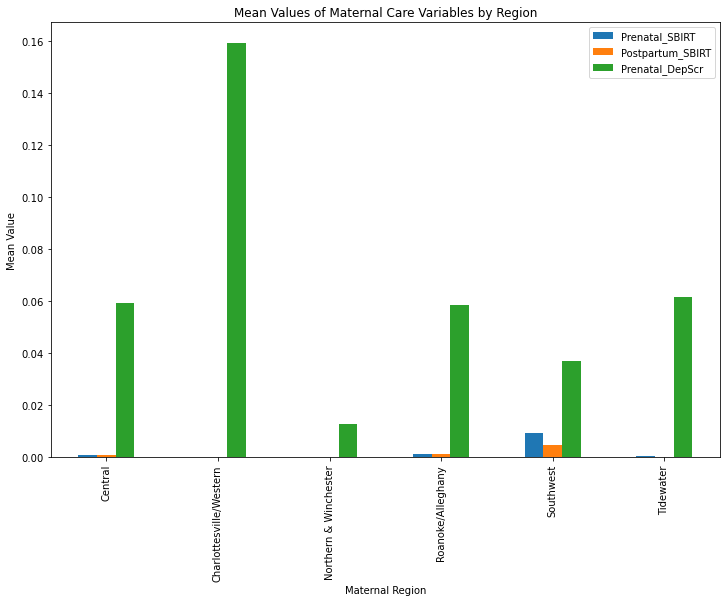

In [168]:


# Group the data by region and compute the mean values for each variable
df_grouped = df.groupby('Maternal_Region').mean()

# Create a bar plot of the mean values for each variable
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size
df_grouped.plot(kind='bar', ax=ax)  # Use the ax parameter to specify the axes object

# Set the plot title and axis labels
ax.set_title('Mean Values of Maternal Care Variables by Region')
ax.set_xlabel('Maternal Region')
ax.set_ylabel('Mean Value')

# Show the plot
plt.show()


In [169]:
df['Medicaid_Program'].unique()

array(['Medicaid for Pregnant Women', 'Other Aid Categories',
       'FAMIS MOMS', 'Medicaid Expansion', 'Not Enrolled'], dtype=object)

# Medicad program variable 

<li> 'Medicaid for Pregnant Women': 0,
<li> 'Other Aid Categories': 1,
<li> 'FAMIS MOMS': 2,
<li> 'Medicaid Expansion': 3,
<li> 'Not Enrolled': 4

In [170]:
medicaid_program_mapping = {
    'Medicaid for Pregnant Women': 0,
    'Other Aid Categories': 1,
    'FAMIS MOMS': 2,
    'Medicaid Expansion': 3,
    'Not Enrolled': 4
}
df['Medicaid_Program'] = df['Medicaid_Program'].replace(medicaid_program_mapping)


/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/3797242378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medicaid_Program'] = df['Medicaid_Program'].replace(medicaid_program_mapping)


In [171]:
df

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,Adequate Plus PNC,False,False,False
1,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for less than or equal to 30 days pri...,Inadequate PNC,False,False,False
3,1,Tidewater,Comparison Group,Enrolled with one MCO prior to delivery,Enrolled for 31 to 90 days prior to delivery,Adequate PNC,False,False,True
4,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,Enrolled for 91 to 180 days prior to delivery,Adequate PNC,False,False,False
6,2,Charlottesville/Western,Comparison Group,Enrolled with one MCO prior to delivery,Enrolled for 91 to 180 days prior to delivery,Adequate Plus PNC,False,False,False
...,...,...,...,...,...,...,...,...,...
34394,3,Tidewater,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Inadequate PNC,False,False,False
34395,0,Central,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Adequate PNC,False,False,False
34396,2,Tidewater,Study Population,Enrolled with one MCO prior to delivery,Enrolled for 91 to 180 days prior to delivery,Inadequate PNC,False,False,False
34398,0,Roanoke/Alleghany,Study Population,Enrolled with one MCO prior to delivery,Enrolled for more than 180 days prior to delivery,Adequate PNC,False,False,False


# Cont_Enroll_Category variable 
<li> 'Enrolled for less than or equal to 30 days prior to delivery': 0,
<li> 'Enrolled for 31 to 90 days prior to delivery': 1,
<li> 'Enrolled for 91 to 180 days prior to delivery': 2,
<li> 'Not continuously enrolled prior to delivery': 3,
<li> 'Enrolled for more than 180 days prior to delivery': 4

In [172]:
cont_enroll_mapping = {
    'Enrolled for less than or equal to 30 days prior to delivery': 0,
    'Enrolled for 31 to 90 days prior to delivery': 1,
    'Enrolled for 91 to 180 days prior to delivery': 2,
    'Not continuously enrolled prior to delivery': 3,
    'Enrolled for more than 180 days prior to delivery': 4
}
df['Cont_Enroll_Category'] = df['Cont_Enroll_Category'].replace(cont_enroll_mapping)


/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/3218459801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cont_Enroll_Category'] = df['Cont_Enroll_Category'].replace(cont_enroll_mapping)


In [173]:
df.head()


,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,Adequate Plus PNC,False,False,False
1,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,Inadequate PNC,False,False,False
3,1,Tidewater,Comparison Group,Enrolled with one MCO prior to delivery,1,Adequate PNC,False,False,True
4,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,2,Adequate PNC,False,False,False
6,2,Charlottesville/Western,Comparison Group,Enrolled with one MCO prior to delivery,2,Adequate Plus PNC,False,False,False


# PNC_Index
<li>'Adequate Plus PNC': 4,
<li>'Adequate PNC': 3,
<li>'Intermediate PNC': 2,
<li>'Inadequate PNC': 1,
<li>'Births with No Prenatal Care': 0,

In [174]:
pnc_mapping = {
    'Adequate Plus PNC': 4,
    'Adequate PNC': 3,
    'Intermediate PNC': 2,
    'Inadequate PNC': 1,
    'Births with No Prenatal Care': 0,
}
df['PNC_Index'] = df['PNC_Index'].replace(pnc_mapping)

# Group the data by 'PNC_Index' and calculate the percentage of records in each group
pnc_percentages = df.groupby('PNC_Index').size().div(len(df)).mul(100)

/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/785918665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PNC_Index'] = df['PNC_Index'].replace(pnc_mapping)


In [175]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,4,False,False,False
1,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,1,False,False,False
3,1,Tidewater,Comparison Group,Enrolled with one MCO prior to delivery,1,3,False,False,True
4,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,2,3,False,False,False
6,2,Charlottesville/Western,Comparison Group,Enrolled with one MCO prior to delivery,2,4,False,False,False


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26164 entries, 0 to 34400
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medicaid_Program      26164 non-null  int64 
 1   Maternal_Region       26164 non-null  object
 2   Population_Group      26164 non-null  object
 3   MCO_COUNT             26164 non-null  object
 4   Cont_Enroll_Category  26164 non-null  int64 
 5   PNC_Index             26164 non-null  object
 6   Prenatal_SBIRT        26164 non-null  bool  
 7   Postpartum_SBIRT      26164 non-null  bool  
 8   Prenatal_DepScr       26164 non-null  bool  
dtypes: bool(3), int64(2), object(4)
memory usage: 1.5+ MB


# Prenatal_SBIRT, Postpartum_SBIRT, Prenatal_DepScr
<li> False = 0
<li> True = 1

In [177]:
df['Prenatal_SBIRT'] = df['Prenatal_SBIRT'].astype(int)
df['Postpartum_SBIRT'] = df['Postpartum_SBIRT'].astype(int)
df['Prenatal_DepScr'] = df['Prenatal_DepScr'].astype(int)


/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/1951513099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prenatal_SBIRT'] = df['Prenatal_SBIRT'].astype(int)
/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/1951513099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postpartum_SBIRT'] = df['Postpartum_SBIRT'].astype(int)
/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/1951513099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [178]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,4,0,0,0
1,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,0,1,0,0,0
3,1,Tidewater,Comparison Group,Enrolled with one MCO prior to delivery,1,3,0,0,1
4,0,Tidewater,Comparison Group,Not enrolled with an MCO prior to delivery (e....,2,3,0,0,0
6,2,Charlottesville/Western,Comparison Group,Enrolled with one MCO prior to delivery,2,4,0,0,0


# Population_Group
<li>'Comparison Group': 0,
<li>'Study Population': 1,

In [179]:
pop_group_mapping = {
    'Comparison Group': 0,
    'Study Population': 1,
}

df['Population_Group'] = df['Population_Group'].map(pop_group_mapping)


/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/1722226936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population_Group'] = df['Population_Group'].map(pop_group_mapping)


In [180]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,Not enrolled with an MCO prior to delivery (e....,0,4,0,0,0
1,0,Tidewater,0,Not enrolled with an MCO prior to delivery (e....,0,1,0,0,0
3,1,Tidewater,0,Enrolled with one MCO prior to delivery,1,3,0,0,1
4,0,Tidewater,0,Not enrolled with an MCO prior to delivery (e....,2,3,0,0,0
6,2,Charlottesville/Western,0,Enrolled with one MCO prior to delivery,2,4,0,0,0


# MCO_COUNT
<LI>"Not enrolled with an MCO prior to delivery (e.g., FFS)": 0,
<LI>"Enrolled with one MCO prior to delivery": 1,
<LI>"Not enrolled prior to delivery": 2,
<LI>"Enrolled with more than one MCO prior to delivery": 3

In [181]:
mapping = {"Not enrolled with an MCO prior to delivery (e.g., FFS)": 0,
           "Enrolled with one MCO prior to delivery": 1,
           "Not enrolled prior to delivery": 2,
           "Enrolled with more than one MCO prior to delivery": 3}

df['MCO_COUNT'] = df['MCO_COUNT'].replace(mapping)


/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/1877323862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MCO_COUNT'] = df['MCO_COUNT'].replace(mapping)


In [182]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,0,0,4,0,0,0
1,0,Tidewater,0,0,0,1,0,0,0
3,1,Tidewater,0,1,1,3,0,0,1
4,0,Tidewater,0,0,2,3,0,0,0
6,2,Charlottesville/Western,0,1,2,4,0,0,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26164 entries, 0 to 34400
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medicaid_Program      26164 non-null  int64 
 1   Maternal_Region       26164 non-null  object
 2   Population_Group      26164 non-null  int64 
 3   MCO_COUNT             26164 non-null  int64 
 4   Cont_Enroll_Category  26164 non-null  int64 
 5   PNC_Index             26164 non-null  object
 6   Prenatal_SBIRT        26164 non-null  int64 
 7   Postpartum_SBIRT      26164 non-null  int64 
 8   Prenatal_DepScr       26164 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.0+ MB


In [184]:
df['Maternal_Region'].unique()

array(['Tidewater', 'Charlottesville/Western', 'Central',
       'Northern & Winchester', 'Roanoke/Alleghany', 'Southwest'],
      dtype=object)

# Mapping 

In [186]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,0,0,4,0,0,0
1,0,Tidewater,0,0,0,1,0,0,0
3,1,Tidewater,0,1,1,3,0,0,1
4,0,Tidewater,0,0,2,3,0,0,0
6,2,Charlottesville/Western,0,1,2,4,0,0,0


# Medicad program

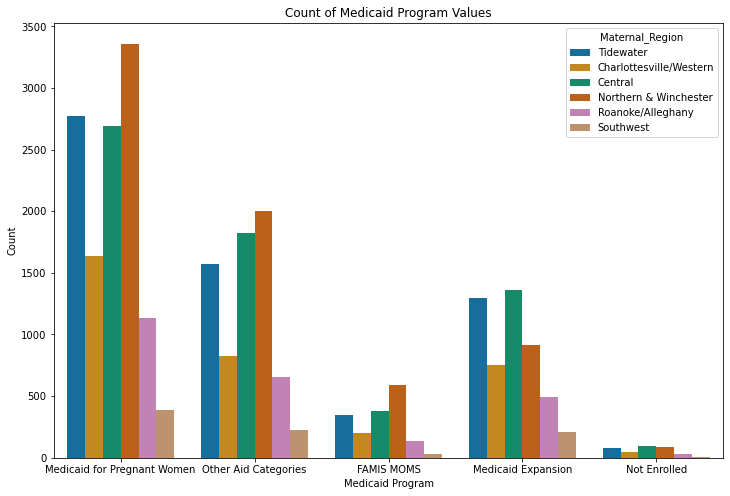

In [187]:
legend_labels = {
    0: 'Medicaid for Pregnant Women',
    1: 'Other Aid Categories',
    2: 'FAMIS MOMS',
    3: 'Medicaid Expansion',
    4: 'Not Enrolled'
}

# Create the count plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Medicaid_Program',hue='Maternal_Region', data=df, palette='colorblind')

# Set the legend labels
ax.set_xticklabels([legend_labels[x] for x in range(len(legend_labels))])

# Set the plot title and axis labels
plt.title('Count of Medicaid Program Values')
plt.xlabel('Medicaid Program')
plt.ylabel('Count')

# Show the plot
plt.show()

In [188]:
df['Medicaid_Program'].value_counts()

0    11979
1     7111
3     5036
2     1689
4      349
Name: Medicaid_Program, dtype: int64

In [189]:
df['Maternal_Region'].unique()

array(['Tidewater', 'Charlottesville/Western', 'Central',
       'Northern & Winchester', 'Roanoke/Alleghany', 'Southwest'],
      dtype=object)

# Cont_Enroll_Category

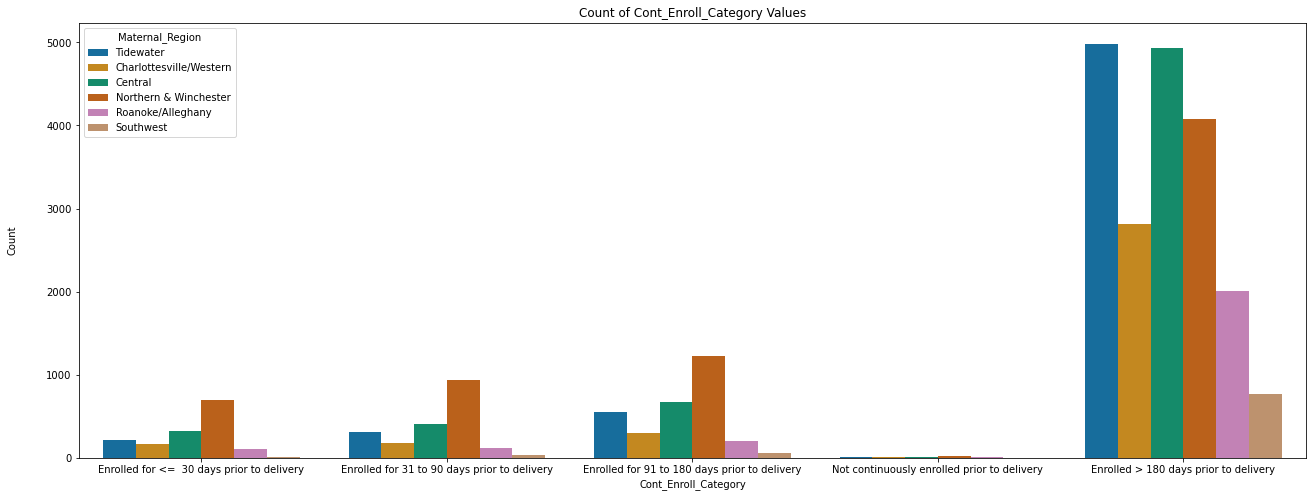

In [190]:

# Define the legend labels
legend_labels = {
    0: 'Enrolled for <=  30 days prior to delivery',
    1: 'Enrolled for 31 to 90 days prior to delivery',
    2: 'Enrolled for 91 to 180 days prior to delivery',
    3: 'Not continuously enrolled prior to delivery',
    4: 'Enrolled > 180 days prior to delivery'
}

# Create the count plot
fig, ax = plt.subplots(figsize=(22, 8))
sns.countplot(x='Cont_Enroll_Category',hue='Maternal_Region', data=df, palette='colorblind')

# Set the legend labels
ax.set_xticklabels(list(legend_labels.values()))

# Set the plot title and axis labels
plt.title('Count of Cont_Enroll_Category Values')
plt.xlabel('Cont_Enroll_Category')
plt.ylabel('Count')

# Set the y-axis label coordinates to stack underneath the column
ax.yaxis.set_label_coords(-0.05, 0.5)

# Show the plot
plt.show()


# PNC_Index

In [191]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,0,0,4,0,0,0
1,0,Tidewater,0,0,0,1,0,0,0
3,1,Tidewater,0,1,1,3,0,0,1
4,0,Tidewater,0,0,2,3,0,0,0
6,2,Charlottesville/Western,0,1,2,4,0,0,0


In [192]:
df = df[df['PNC_Index'] != 'Missing Info']

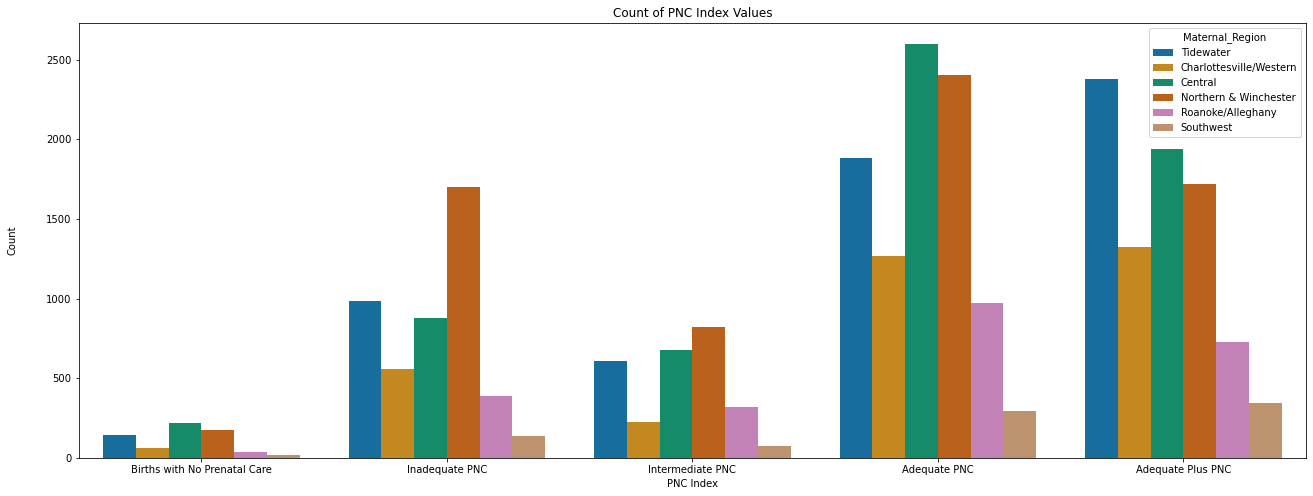

In [193]:
# Define the legend labels
legend_labels = {
    4: 'Adequate Plus PNC',
    3: 'Adequate PNC',
    2: 'Intermediate PNC',
    1: 'Inadequate PNC',
    0: 'Births with No Prenatal Care',
}

# Create the count plot
fig, ax = plt.subplots(figsize=(22, 8))
sns.countplot(x='PNC_Index', hue='Maternal_Region', data=df, palette='colorblind')

# Set the legend labels
ax.set_xticklabels([legend_labels[x] for x in range(len(legend_labels))])

# Set the plot title and axis labels
plt.title('Count of PNC Index Values')
plt.xlabel('PNC Index')
plt.ylabel('Count')

# Set the y-axis label coordinates to stack underneath the column
ax.yaxis.set_label_coords(-0.05, 0.5)

# Show the plot
plt.show()


In [194]:
df['PNC_Index'].unique()

array([4, 1, 3, 0, 2], dtype=object)

# 'Prenatal_SBIRT', 'Postpartum_SBIRT', 'Prenatal_DepScr

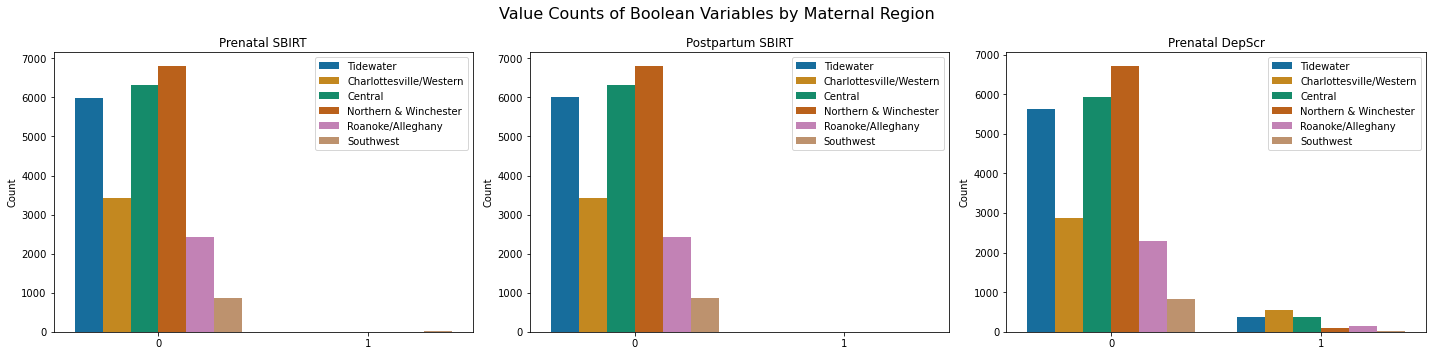

In [195]:
# Define the list of variables and their corresponding display names
variables = ['Prenatal_SBIRT', 'Postpartum_SBIRT', 'Prenatal_DepScr']
display_names = ['Prenatal SBIRT', 'Postpartum SBIRT', 'Prenatal DepScr']

# Create a subplot for each variable
fig, axs = plt.subplots(ncols=len(variables), figsize=(20, 5))

# Loop through each variable and plot the value counts based on Maternal_Region
for i, variable in enumerate(variables):
    sns.countplot(x=variable, hue='Maternal_Region', data=df.replace({True: 1, False: 0}), ax=axs[i], palette='colorblind')
    axs[i].set_title(display_names[i])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    axs[i].legend(loc='upper right')

# Set the overall plot title
plt.suptitle('Value Counts of Boolean Variables by Maternal Region', fontsize=16)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [196]:
df['Postpartum_SBIRT'].value_counts()

0    25845
1       10
Name: Postpartum_SBIRT, dtype: int64

In [197]:
df['Prenatal_SBIRT'].value_counts()

0    25836
1       19
Name: Prenatal_SBIRT, dtype: int64

In [198]:
df['Prenatal_DepScr'].value_counts()

0    24297
1     1558
Name: Prenatal_DepScr, dtype: int64

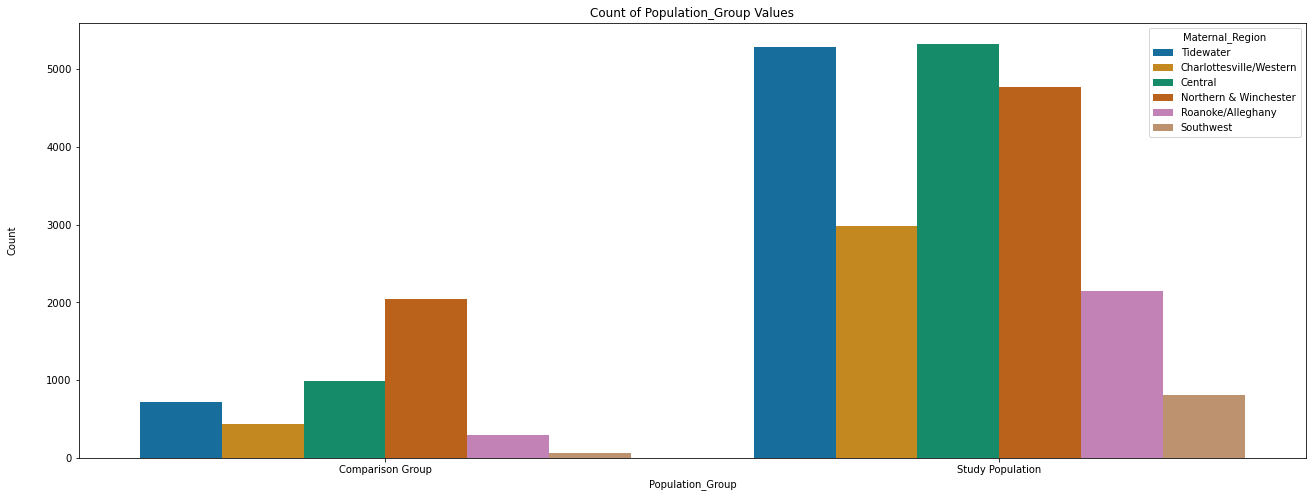

In [199]:
# Define the legend labels
legend_labels = {
    0: 'Comparison Group',
    1: 'Study Population'
}

# Create the count plot
fig, ax = plt.subplots(figsize=(22, 8))
sns.countplot(x='Population_Group', hue='Maternal_Region', data=df, palette='colorblind')

# Set the legend labels
ax.set_xticklabels(list(legend_labels.values()))

# Set the plot title and axis labels
plt.title('Count of Population_Group Values')
plt.xlabel('Population_Group')
plt.ylabel('Count')

# Set the y-axis label coordinates to stack underneath the column
ax.yaxis.set_label_coords(-0.05, 0.5)

# Show the plot
plt.show()


# MCO_COUNT

In [200]:
df.columns

Index(['Medicaid_Program', 'Maternal_Region', 'Population_Group', 'MCO_COUNT',
       'Cont_Enroll_Category', 'PNC_Index', 'Prenatal_SBIRT',
       'Postpartum_SBIRT', 'Prenatal_DepScr'],
      dtype='object')

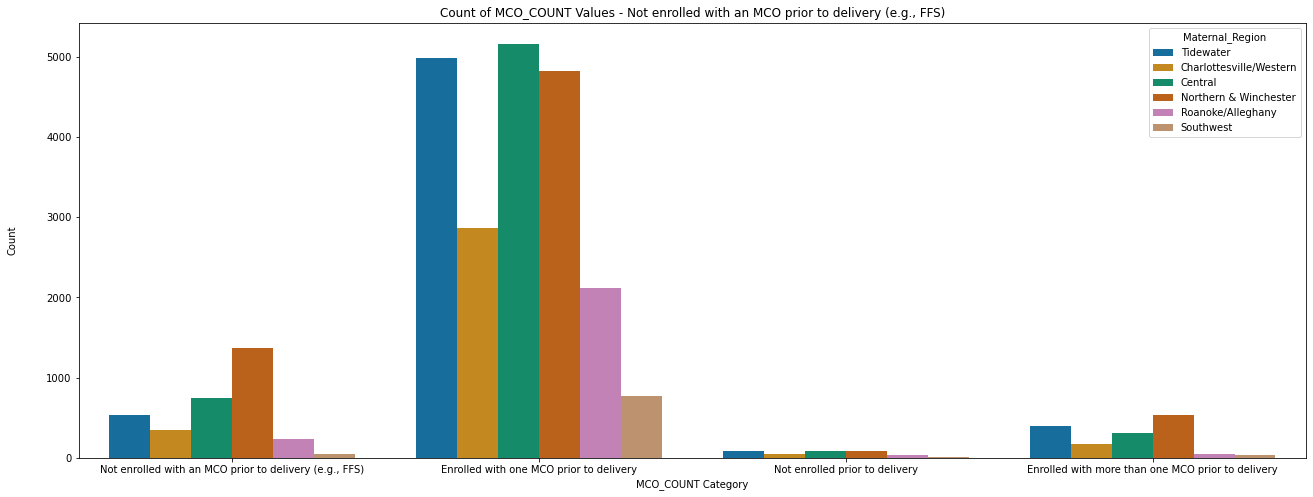

In [201]:

legend_labels = {
    0: "Not enrolled with an MCO prior to delivery (e.g., FFS)",
    1: "Enrolled with one MCO prior to delivery",
    2: "Not enrolled prior to delivery",
    3: "Enrolled with more than one MCO prior to delivery"
}


fig, ax = plt.subplots(figsize=(22, 8))
sns.countplot(x="MCO_COUNT", hue="Maternal_Region", data=df, palette="colorblind")


ax.set_xticklabels(list(legend_labels.values()))


plt.title("Count of MCO_COUNT Values - Not enrolled with an MCO prior to delivery (e.g., FFS)")
plt.xlabel("MCO_COUNT Category")
plt.ylabel("Count")


ax.yaxis.set_label_coords(-0.05, 0.5)

plt.show()




In [202]:
df.head()


,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,0,0,4,0,0,0
1,0,Tidewater,0,0,0,1,0,0,0
3,1,Tidewater,0,1,1,3,0,0,1
4,0,Tidewater,0,0,2,3,0,0,0
6,2,Charlottesville/Western,0,1,2,4,0,0,0


In [203]:
df.to_csv('my_data.csv')


In [204]:
df['Maternal_Region'].value_counts()



Northern & Winchester      6815
Central                    6311
Tidewater                  5997
Charlottesville/Western    3429
Roanoke/Alleghany          2436
Southwest                   867
Name: Maternal_Region, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25855 entries, 0 to 34400
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Medicaid_Program      25855 non-null  int64 
 1   Maternal_Region       25855 non-null  object
 2   Population_Group      25855 non-null  int64 
 3   MCO_COUNT             25855 non-null  int64 
 4   Cont_Enroll_Category  25855 non-null  int64 
 5   PNC_Index             25855 non-null  object
 6   Prenatal_SBIRT        25855 non-null  int64 
 7   Postpartum_SBIRT      25855 non-null  int64 
 8   Prenatal_DepScr       25855 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.0+ MB


In [206]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,0,Tidewater,0,0,0,4,0,0,0
1,0,Tidewater,0,0,0,1,0,0,0
3,1,Tidewater,0,1,1,3,0,0,1
4,0,Tidewater,0,0,2,3,0,0,0
6,2,Charlottesville/Western,0,1,2,4,0,0,0


In [207]:
df['Maternal_Region'].value_counts()

Northern & Winchester      6815
Central                    6311
Tidewater                  5997
Charlottesville/Western    3429
Roanoke/Alleghany          2436
Southwest                   867
Name: Maternal_Region, dtype: int64

In [208]:
# define a function to get the latitude and longitude based on the region name
def get_lat_long(region):
    if region == 'Northern & Winchester':
        return (39.1857, -78.1633)
    elif region == 'Central':
        return (37.5000, -78.5000)
    elif region == 'Tidewater':
        return (37.0833, -76.3833)
    elif region == 'Charlottesville/Western':
        return (38.0293, -78.4767)
    elif region == 'Roanoke/Alleghany':
        return (37.2709, -79.9414)
    elif region == 'Southwest':
        return (36.6500, -82.0000)
    else:
        return (None, None)

# add the latitude and longitude columns to the DataFrame
df['Latitude'], df['Longitude'] = zip(*df['Maternal_Region'].apply(get_lat_long))

# print the first few rows of the updated DataFrame
print(df.head())







   Medicaid_Program          Maternal_Region  Population_Group  MCO_COUNT  \
0                 0                Tidewater                 0          0   
1                 0                Tidewater                 0          0   
3                 1                Tidewater                 0          1   
4                 0                Tidewater                 0          0   
6                 2  Charlottesville/Western                 0          1   

   Cont_Enroll_Category PNC_Index  Prenatal_SBIRT  Postpartum_SBIRT  \
0                     0         4               0                 0   
1                     0         1               0                 0   
3                     1         3               0                 0   
4                     2         3               0                 0   
6                     2         4               0                 0   

   Prenatal_DepScr  Latitude  Longitude  
0                0   37.0833   -76.3833  
1                0   37.08

/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/2978049282.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'], df['Longitude'] = zip(*df['Maternal_Region'].apply(get_lat_long))
/var/folders/rp/_9dmf8c92tl122d82xm7kvth0000gn/T/ipykernel_16610/2978049282.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'], df['Longitude'] = zip(*df['Maternal_Region'].apply(get_lat_long))


In [209]:
df.head()

,Medicaid_Program,Maternal_Region,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr,Latitude,Longitude
0,0,Tidewater,0,0,0,4,0,0,0,37.0833,-76.3833
1,0,Tidewater,0,0,0,1,0,0,0,37.0833,-76.3833
3,1,Tidewater,0,1,1,3,0,0,1,37.0833,-76.3833
4,0,Tidewater,0,0,2,3,0,0,0,37.0833,-76.3833
6,2,Charlottesville/Western,0,1,2,4,0,0,0,38.0293,-78.4767


In [218]:
df['Medicaid_Program'].value_counts()

0    11841
1     7011
3     4981
2     1673
4      349
Name: Medicaid_Program, dtype: int64

 0: 'Medicaid for Pregnant Women',
    1: 'Other Aid Categories',
    2: 'FAMIS MOMS',
    3: 'Medicaid Expansion',
    4: 'Not Enrolled'

In [226]:
import pandas as pd

df_without_region = df.drop('Maternal_Region', axis=1)
medicaid_counts = df_without_region['Medicaid_Program'].value_counts()
pop_counts = df_without_region['Population_Group'].value_counts()
mco_counts = df_without_region['MCO_COUNT'].value_counts()
enroll_counts = df_without_region['Cont_Enroll_Category'].value_counts()
pnc_counts = df_without_region['PNC_Index'].value_counts()
prenatal_sbirt_counts = df_without_region['Prenatal_SBIRT'].value_counts()
postpartum_sbirt_counts = df_without_region['Postpartum_SBIRT'].value_counts()
prenatal_depscr_counts = df_without_region['Prenatal_DepScr'].value_counts()

counts_df = pd.DataFrame({'Medicaid_Program': medicaid_counts, 
                          'Population_Group': pop_counts, 
                          'MCO_COUNT': mco_counts, 
                          'Cont_Enroll_Category': enroll_counts, 
                          'PNC_Index': pnc_counts, 
                          'Prenatal_SBIRT': prenatal_sbirt_counts, 
                          'Postpartum_SBIRT': postpartum_sbirt_counts, 
                          'Prenatal_DepScr': prenatal_depscr_counts})


In [227]:
counts_df.head()

,Medicaid_Program,Population_Group,MCO_COUNT,Cont_Enroll_Category,PNC_Index,Prenatal_SBIRT,Postpartum_SBIRT,Prenatal_DepScr
0,11841,4533.0,3284.0,1507,655,25836.0,25845.0,24297.0
1,7011,21322.0,20731.0,1949,4644,19.0,10.0,1558.0
2,1673,NaN,349.0,2969,2718,NaN,NaN,NaN
3,4981,NaN,1491.0,66,9409,NaN,NaN,NaN
4,349,NaN,NaN,19364,8429,NaN,NaN,NaN


In [223]:
df['Maternal_Region'].value_counts()

Northern & Winchester      6815
Central                    6311
Tidewater                  5997
Charlottesville/Western    3429
Roanoke/Alleghany          2436
Southwest                   867
Name: Maternal_Region, dtype: int64

In [228]:
counts_df.to_csv('data2')